<a href="https://colab.research.google.com/github/egu33/QandA/blob/master/make_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# モデルの訓練と保存


#### バージョンの確認



In [2]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.2.0
2.3.1


Using TensorFlow backend.


## 訓練データの読み込み
cifar-10の読み込み。
cifer-10・・・約6万枚の画像を抽出してラベル付けしたデータセット


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10 # kerasのdatasetsからcifer-10をインポート
from keras.preprocessing.image import ImageDataGenerator #データ拡張のためImageDataGeneratorをインポート

(x_train, t_train), (x_test, t_test) = cifar10.load_data() #cifer-10を読み込み訓練用とテスト用に分割

170500096/170498071 [==============================] - 6s 0us/step


## モデルの構築
CNNのモデルを構築

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

batch_size = 32
epochs = 20
n_class = 10

t_train = keras.utils.to_categorical(t_train, n_class)  # one-hot表現に
t_test = keras.utils.to_categorical(t_test, n_class)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=x_train.shape[1:]))  # ゼロパディング、バッチサイズ以外の画像の形状を指定
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 一次元の配列に変換
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(n_class))
model.add(Activation("softmax"))

model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)       

## 学習
モデルを訓練する。  
ImageDataGeneratorを使用する際は、学習にfit_generatorメソッドを使う。  
データ拡張を設定し訓練をする


In [5]:
x_train = x_train / 255  # 0から1の範囲に収める
x_test = x_test / 255

generator = ImageDataGenerator(
           rotation_range=0.2, # 回転
           width_shift_range=0.2, # 横方向へのシフト
           height_shift_range=0.2, # 縦方向へのシフト
           shear_range=10, # 剪断
           zoom_range=0.2, # ズームの範囲
           horizontal_flip=True)
generator.fit(x_train)

history = model.fit_generator(generator.flow(x_train, t_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, t_test))

Epoch 1/20
1563/1563 [==============================] - 52s 33ms/step - loss: 1.7559 - accuracy: 0.3510 - val_loss: 1.3697 - val_accuracy: 0.5057
Epoch 2/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4562 - accuracy: 0.4719 - val_loss: 1.1898 - val_accuracy: 0.5707
Epoch 3/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.3214 - accuracy: 0.5260 - val_loss: 1.1556 - val_accuracy: 0.5858
Epoch 4/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2289 - accuracy: 0.5619 - val_loss: 1.1534 - val_accuracy: 0.5951
Epoch 5/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1674 - accuracy: 0.5892 - val_loss: 1.0869 - val_accuracy: 0.6223
Epoch 6/20
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1172 - accuracy: 0.6061 - val_loss: 0.9935 - val_accuracy: 0.6545
Epoch 7/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0827 - accuracy: 0.6193 - val_loss: 0.8609 -

## 学習の推移
学習の推移を表示。  
検証用

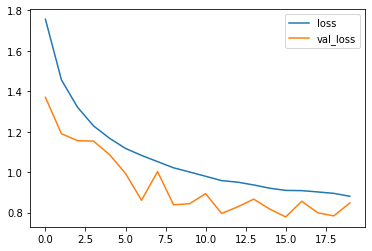

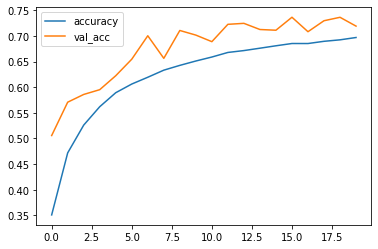

In [8]:
import matplotlib.pyplot as plt

train_loss = history.history["loss"]  # 訓練用データの誤差
train_acc = history.history["accuracy"]  # 訓練用データの精度
val_loss = history.history["val_loss"]  # 検証用データの誤差
val_acc = history.history["val_accuracy"]  # 検証用データの精度

plt.plot(np.arange(len(train_loss)), train_loss, label="loss")
plt.plot(np.arange(len(val_loss)), val_loss, label="val_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label="accuracy")
plt.plot(np.arange(len(val_acc)), val_acc, label="val_acc")
plt.legend()
plt.show()

## 評価
モデルの評価。  
結果が未知のデータを予測するため

Accuracyは評価対象事例全てに対して, 正しく分類できた割合を意味する指標

In [9]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

10000/10000 [==============================] - 2s 171us/step
0.8475478176116943 0.718999981880188


## モデルの保存とダウンロード
モデルを保存しダウンロード。

In [11]:
from google.colab import files

model.save("image_classifier.h5",  include_optimizer=False)
files.download("image_classifier.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
